In [1]:
import pandas as pd

In [2]:
mypath = 'C:\\Users\\PaulPeton\\OneDrive - AZEO\\POWER BI\\tables'

In [3]:
from os import listdir
from os.path import isfile, join
mytables = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [4]:
mytables

['Achats.csv',
 'Calendrier.csv',
 'Clients.csv',
 'Géographie.csv',
 'Pays.csv',
 'Produits.csv',
 'Retours.csv']

# CHARGEMENT

In [5]:
#https://stackoverflow.com/questions/19579908/a-loop-that-creates-unique-objects-with-every-iteration-based-on-which-iterati

for f in mytables:
    fname = f.split(".")[0]
    print(fname)
    globals()[fname] = pd.read_csv(mypath + '\\' + f)

Achats
Calendrier
Clients
Géographie
Pays
Produits
Retours


In [6]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'import pandas as pd',
  "mypath = 'C:\\\\Users\\\\PaulPeton\\\\OneDrive - AZEO\\\\POWER BI\\\\tables'",
  'from os import listdir\nfrom os.path import isfile, join\nmytables = [f for f in listdir(mypath) if isfile(join(mypath, f))]',
  'mytables',
  '#https://stackoverflow.com/questions/19579908/a-loop-that-creates-unique-objects-with-every-iteration-based-on-which-iterati\n\nfor f in mytables:\n    fname = f.split(".")[0]\n    print(fname)\n    globals()[fname] = pd.read_csv(mypath + \'\\\\\' + f)',
  'globals()'],
 '_oh': {4: ['Achats.csv',
   'Calendrier.csv',
   'Clients.csv',
   'Géographie.csv',
   'Pays.csv',
   'Produits.csv',
   'Retours.csv']},
 '_dh': ['C:\\Users\\PaulPeton\\Documents\\Python Scripts

### HEADERS

In [7]:
Achats.head()

,ID ligne,ID commande,Date de commande,Date d'expédition,Mode d'expédition,ID client,ID produit,Montant des ventes,Quantité,Remise,Profit,Retour
0,1,ES-2015-1311038,"2016-02-07 00:00:00,000","2016-02-11 00:00:00,000",Tarif normal,AP-10045,FOU-ST-10004184,792,3,0,396,Non
1,3,ES-2015-1311038,"2016-02-07 00:00:00,000","2016-02-11 00:00:00,000",Tarif normal,AP-10045,FOU-ÉT-10001648,3519,3,0,1611,Non
2,5,ES-2015-1311038,"2016-02-07 00:00:00,000","2016-02-11 00:00:00,000",Tarif normal,AP-10045,PRO-AC-10002403,30744,3,0,7371,Non
3,7,ES-2015-1311038,"2016-02-07 00:00:00,000","2016-02-11 00:00:00,000",Tarif normal,AP-10045,PRO-TÉ-10002604,41382,3,0,2061,Non
4,29,ES-2015-2557751,"2016-02-28 00:00:00,000","2016-03-03 00:00:00,000",Tarif normal,TC-20920,FOU-ÉL-10003473,4194,3,0,792,Oui


In [8]:
Achats.columns

Index(['ID ligne', 'ID commande', 'Date de commande', 'Date d'expédition',
       'Mode d'expédition', 'ID client', 'ID produit', 'Montant des ventes',
       'Quantité', 'Remise', 'Profit', 'Retour'],
      dtype='object')

In [9]:
Achats.groupby(["Mode d'expédition"]).size()

Mode d'expédition
J+2             1976
Le même jour     516
Prioritaire     1454
Tarif normal    6054
dtype: int64

In [10]:
Achats.groupby(["Mode d'expédition", "Retour"]).size()

Mode d'expédition  Retour
J+2                Non       1815
                   Oui        161
Le même jour       Non        494
                   Oui         22
Prioritaire        Non       1354
                   Oui        100
Tarif normal       Non       5700
                   Oui        354
dtype: int64

# REGROUPEMENTS

### One Hot Encoding

In [11]:
df1 = Produits.drop("Nom du produit (clusters)", 1).drop("Nom du produit (clusters) 2", 1)

In [12]:
df1.head()

,ID produit,Nom du produit,Sous-catégorie,Catégorie
0,FOU-AR-10000930,"BIC Carnet de croquis, Bleu",Art,Fournitures de bureau
1,FOU-AR-10000541,"BIC Carnet de croquis, Emballage en vrac",Art,Fournitures de bureau
2,FOU-AR-10001361,"BIC Carnet de croquis, Métal",Art,Fournitures de bureau
3,FOU-AR-10000913,"BIC Carnet de croquis, Tailles assorties",Art,Fournitures de bureau
4,FOU-AR-10004756,"BIC Marqueurs, Bleu",Art,Fournitures de bureau


In [13]:
df1["Catégorie"] = df1["Catégorie"].astype('category')
df1["Sous-catégorie"] = df1["Sous-catégorie"].astype('category')

categories = pd.get_dummies(df1["Catégorie"], prefix='Cat')

df11 = pd.concat([df1, categories], axis=1, join='inner').drop(["Catégorie", "Sous-catégorie"], axis=1)
df11.head()

,ID produit,Nom du produit,Cat_Fournitures de bureau,Cat_Mobilier,Cat_Produits technologiques
0,FOU-AR-10000930,"BIC Carnet de croquis, Bleu",1,0,0
1,FOU-AR-10000541,"BIC Carnet de croquis, Emballage en vrac",1,0,0
2,FOU-AR-10001361,"BIC Carnet de croquis, Métal",1,0,0
3,FOU-AR-10000913,"BIC Carnet de croquis, Tailles assorties",1,0,0
4,FOU-AR-10004756,"BIC Marqueurs, Bleu",1,0,0


### ROWS

In [14]:
df2 = Achats

In [15]:
df2.head()

,ID ligne,ID commande,Date de commande,Date d'expédition,Mode d'expédition,ID client,ID produit,Montant des ventes,Quantité,Remise,Profit,Retour
0,1,ES-2015-1311038,"2016-02-07 00:00:00,000","2016-02-11 00:00:00,000",Tarif normal,AP-10045,FOU-ST-10004184,792,3,0,396,Non
1,3,ES-2015-1311038,"2016-02-07 00:00:00,000","2016-02-11 00:00:00,000",Tarif normal,AP-10045,FOU-ÉT-10001648,3519,3,0,1611,Non
2,5,ES-2015-1311038,"2016-02-07 00:00:00,000","2016-02-11 00:00:00,000",Tarif normal,AP-10045,PRO-AC-10002403,30744,3,0,7371,Non
3,7,ES-2015-1311038,"2016-02-07 00:00:00,000","2016-02-11 00:00:00,000",Tarif normal,AP-10045,PRO-TÉ-10002604,41382,3,0,2061,Non
4,29,ES-2015-2557751,"2016-02-28 00:00:00,000","2016-03-03 00:00:00,000",Tarif normal,TC-20920,FOU-ÉL-10003473,4194,3,0,792,Oui


# JOINTURES

pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [16]:
df = pd.merge(df11, df2, how='inner', on='ID produit')

In [17]:
df.sort_values('ID produit', ascending = True).head()

,ID produit,Nom du produit,Cat_Fournitures de bureau,Cat_Mobilier,Cat_Produits technologiques,ID ligne,ID commande,Date de commande,Date d'expédition,Mode d'expédition,ID client,Montant des ventes,Quantité,Remise,Profit,Retour
1413,FOU-AR-10000028,"Stanley Toile, Métal",1,0,0,7698,IT-2013-2399688,"2014-05-24 00:00:00,000","2014-05-29 00:00:00,000",Tarif normal,AA-11020,20292,4,0,6492,Non
1420,FOU-AR-10000028,"Stanley Toile, Métal",1,0,0,1059,ES-2015-2012335,"2016-08-25 00:00:00,000","2016-09-01 00:00:00,000",Tarif normal,TD-15235,91314,2,1,22314,Non
1419,FOU-AR-10000028,"Stanley Toile, Métal",1,0,0,7372,ES-2015-2283801,"2016-01-01 00:00:00,000","2016-01-05 00:00:00,000",J+2,GB-14740,15219,3,0,4869,Non
1418,FOU-AR-10000028,"Stanley Toile, Métal",1,0,0,4310,ES-2015-4478437,"2016-03-04 00:00:00,000","2016-03-04 00:00:00,000",Le même jour,SG-20395,35511,7,0,11361,Non
1417,FOU-AR-10000028,"Stanley Toile, Métal",1,0,0,1515,ES-2014-2155035,"2015-08-23 00:00:00,000","2015-08-25 00:00:00,000",J+2,RC-19615,30438,6,0,9738,Non


In [18]:
df.describe()

,Cat_Fournitures de bureau,Cat_Mobilier,Cat_Produits technologiques,ID ligne,Montant des ventes,Quantité,Remise,Profit
count,10000.000000,10000.000000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,1.000000e+04
mean,0.658900,0.150100,0.191000,5000.50000,2.030463e+05,3.777300,1.845100,8.741313e+03
std,0.474103,0.357187,0.393109,2886.89568,1.107899e+06,2.203268,4.917431,2.546232e+05
min,0.000000,0.000000,0.000000,1.00000,6.000000e+00,1.000000,0.000000,-8.024925e+06
25%,0.000000,0.000000,0.000000,2500.75000,3.698250e+03,2.000000,0.000000,4.500000e+01
50%,1.000000,0.000000,0.000000,5000.50000,1.320300e+04,3.000000,0.000000,1.092000e+03
75%,1.000000,0.000000,0.000000,7500.25000,6.904575e+04,5.000000,1.000000,6.156000e+03
max,1.000000,1.000000,1.000000,10000.00000,2.910188e+07,14.000000,85.000000,8.417925e+06


In [19]:
df_clean = df.dropna()
print(df_clean.count())

ID produit                     10000
Nom du produit                 10000
Cat_Fournitures de bureau      10000
Cat_Mobilier                   10000
Cat_Produits technologiques    10000
ID ligne                       10000
ID commande                    10000
Date de commande               10000
Date d'expédition              10000
Mode d'expédition              10000
ID client                      10000
Montant des ventes             10000
Quantité                       10000
Remise                         10000
Profit                         10000
Retour                         10000
dtype: int64


In [20]:
df_clean_groupby = df_clean.groupby(['ID produit','Nom du produit']).agg({'ID ligne':'nunique', 'ID commande':'nunique','ID client':'nunique','Montant des ventes':'sum','Quantité':'sum','Remise':'sum','Profit':'sum'}).reset_index()
df_clean_groupby = df_clean_groupby.rename(columns={'ID ligne':'nb rows'})
df_clean_groupby

,ID produit,Nom du produit,nb rows,ID commande,ID client,Montant des ventes,Quantité,Remise,Profit
0,FOU-AR-10000028,"Stanley Toile, Métal",11,11,11,314526,46,1,93726
1,FOU-AR-10000033,"Binney & Smith Surligneurs, Bleu",2,2,2,8295,5,0,1230
2,FOU-AR-10000080,"Stanley Surligneurs, Métal",11,11,11,63840,40,0,23520
3,FOU-AR-10000102,"Sanford Surligneurs, Emballage en vrac",18,18,18,201051,59,7,-7200
4,FOU-AR-10000240,"Sanford Toile, Bleu",13,13,13,234918,37,12,53724
5,FOU-AR-10000306,"Boston Stylos, Emballage en vrac",10,10,10,53613,37,0,17649
6,FOU-AR-10000331,"Binney & Smith Surligneurs, Métal",16,16,16,78897,53,10,-17280
7,FOU-AR-10000397,"Boston Taille-crayon, Métal",13,13,13,477318,57,7,35706
8,FOU-AR-10000415,"Boston Marqueurs, Tailles assorties",12,12,12,134157,38,5,-73875
9,FOU-AR-10000475,"BIC Marqueurs, Métal",16,16,16,196599,65,10,-38001


In [21]:
df_clean_groupby.describe()

,nb rows,ID commande,ID client,Montant des ventes,Quantité,Remise,Profit
count,1909.000000,1909.000000,1909.000000,1.909000e+03,1909.000000,1909.000000,1.909000e+03
mean,5.238345,5.233106,5.211105,1.063627e+06,19.786799,9.665270,4.579001e+04
std,3.848313,3.839909,3.810496,3.137905e+06,15.419913,14.785984,6.782545e+05
min,1.000000,1.000000,1.000000,3.000000e+01,1.000000,0.000000,-8.034354e+06
25%,3.000000,3.000000,3.000000,2.868000e+04,9.000000,0.000000,-3.114000e+03
50%,4.000000,4.000000,4.000000,1.229850e+05,16.000000,5.000000,4.887000e+03
75%,6.000000,6.000000,6.000000,6.741540e+05,26.000000,12.000000,3.912300e+04
max,30.000000,30.000000,28.000000,4.634160e+07,144.000000,130.000000,8.722998e+06


# CLUSTERING

In [22]:
df_cluster = df_clean_groupby.drop('Nom du produit',1).set_index('ID produit')

In [23]:
df_cluster.dtypes

nb rows               int64
ID commande           int64
ID client             int64
Montant des ventes    int64
Quantité              int64
Remise                int64
Profit                int64
dtype: object

In [24]:
from sklearn import preprocessing

x = df_cluster.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_cluster_norm = pd.DataFrame(x_scaled)

df_cluster_norm.columns = df_cluster.columns
df_cluster_norm.index = df_cluster.index

df_cluster_norm.head()

,nb rows,ID commande,ID client,Montant des ventes,Quantité,Remise,Profit
ID produit,,,,,,,
FOU-AR-10000028,0.344828,0.344828,0.370370,0.006786,0.314685,0.007692,0.485046
FOU-AR-10000033,0.034483,0.034483,0.037037,0.000178,0.027972,0.000000,0.479526
FOU-AR-10000080,0.344828,0.344828,0.370370,0.001377,0.272727,0.000000,0.480856
FOU-AR-10000102,0.586207,0.586207,0.629630,0.004338,0.405594,0.053846,0.479023
FOU-AR-10000240,0.413793,0.413793,0.444444,0.005069,0.251748,0.092308,0.482658


In [25]:
k=4

[[0.05647852 0.05644264 0.06050796 0.01030179 0.06172184 0.03328264
  0.48168067]
 [0.12563299 0.12563299 0.13468013 0.14594233 0.11301286 0.37525551
  0.48182102]
 [0.4190259  0.41822085 0.4461738  0.01990506 0.33920165 0.09871296
  0.48405447]
 [0.18078278 0.18059401 0.19282238 0.01446817 0.16085192 0.05641494
  0.48228772]]


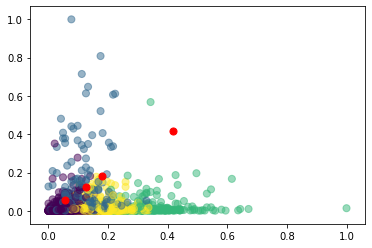

In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k).fit(df_cluster_norm)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df_cluster_norm['Quantité'], df_cluster_norm['Montant des ventes'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [30]:
predict=kmeans.predict(df_cluster_norm)
df_clean['cluster'] = pd.Series(predict, index=df_clean_groupby.index) 

In [35]:
df_agg = df_clean.groupby(['cluster']).agg({'Montant des ventes':['size','min','mean', 'max'], 'Quantité':['min','mean', 'max'], 'Remise' : ['min','mean', 'max'], 'Profit' : ['min','mean', 'max']}).reset_index().round(2)#.sort_values('size', ascending = False)
df_agg.head()

cluster Montant des ventes                       Quantité           Remise  \
                        size min      mean     max      min  mean max    min   
0     0.0                961   6  12770.69  331695        1  3.69  14      0   
1     1.0                143  18  11748.52  131625        1  3.62  11      0   
2     2.0                257  96  15263.09  351864        1  3.75  14      0   
3     3.0                548   6  13601.21  445176        1  3.80  14      0   

            Profit                   
   mean max    min     mean     max  
0  0.62   5 -90225  1305.58  125265  
1  0.57   5 -38445  1690.91   24288  
2  0.74   5 -75705  1998.78   74184  
3  0.60   5 -55125  1866.93  123606